# Emotion Classification

Dataset downloded from: 


https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?datasetId=605165&sortBy=voteCount&select=val.txt



## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

In [3]:
# with open('/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat '/gdrive/My Drive/foo.txt'

## Loading Data

In [4]:
base_path = "drive/MyDrive/data/emotions/"

# train
df_train = pd.read_csv(f"{base_path}train.txt", names=["Text", "Emotion"], sep=";")
print(f"train shape: ",df_train.shape)
# test
df_test = pd.read_csv(f"{base_path}test.txt", names=["Text", "Emotion"], sep=";")
print(f"test shape: ",df_test.shape)
# validation
df_val = pd.read_csv(f"{base_path}val.txt", names=["Text", "Emotion"], sep=";")
print(f"validation shape: ",df_val.shape)

train shape:  (16000, 2)
test shape:  (2000, 2)
validation shape:  (2000, 2)


In [5]:
df_train.sample(5)

,Text,Emotion
10220,i have of myself right now is that i feel pret...,joy
5123,i would feel resentful toward patrick because ...,anger
15834,i am feeling quite pleased with myself at this...,joy
4547,i leave in four weeks and im starting to feel ...,sadness
970,i feel resigned to what i have brought myself ...,sadness


## EDA

In [6]:
df_train["Emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

Text(0.5, 1.0, 'Frequency of classes for validation')

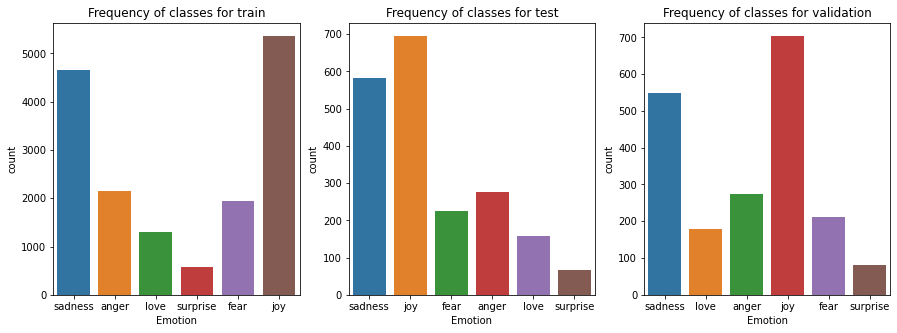

In [7]:
# Visualisation
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot(data=df_train, x="Emotion", ax=axes[0]).set_title("Frequency of classes for train")
sns.countplot(data=df_test, x="Emotion", ax=axes[1]).set_title("Frequency of classes for test")
sns.countplot(data=df_val, x="Emotion", ax=axes[2]).set_title("Frequency of classes for validation")

In [8]:
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())
df_val.isnull().sum().sum()

0
0


0

## Vectorization

In [9]:
# train dataset
X = df_train["Text"]

In [10]:
vocab_size = 10000
max_length = 100
oov_tok = "[UNK]"

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X)
X_train_pad = pad_sequences(X_train, maxlen=max_length, padding="pre")

In [12]:
df_train["Emotion"] = df_train["Emotion"].replace(
    {'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_train["Emotion"].head()

0    3
1    3
2    1
3    2
4    1
Name: Emotion, dtype: int64

In [13]:
y_train = df_train["Emotion"].values
y_train[:5]

array([3, 3, 1, 2, 1])

In [14]:
y_train = np.array(pd.get_dummies(y_train))
y_train

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [15]:
y_train[:6]

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [16]:
# validation dataset
X_val = df_val["Text"]
y_val = df_val["Emotion"].replace(
    {'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [17]:
X_val = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val, maxlen=max_length, padding="pre")

In [18]:
y_val = np.array(pd.get_dummies(y_val))
y_val

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [19]:
y_val[:6]

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [20]:
# test dataset
X_test = df_test["Text"]
y_test = df_test["Emotion"].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [21]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test, maxlen=max_length, padding="pre")

In [22]:
y_test = np.array(pd.get_dummies(y_test))
y_test

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [23]:
y_test[:6]

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

## Modelling

In [24]:
n_class = y_train.shape[1]
n_class

6

In [25]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=64, 
                    input_length=max_length))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(LSTM(units=32))
model.add(Dense(n_class, activation="softmax"))

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 64)          41216     
 nal)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 6)                 1

## Model Compiling 

In [27]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics="accuracy")

In [28]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3)

In [29]:
history = model.fit(X_train_pad, 
                    y_train, 
                    validation_data=(X_val_pad, y_val), 
                    epochs=100, 
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
500/500 [==============================] - 26s 28ms/step - loss: 1.2718 - accuracy: 0.5197 - val_loss: 0.7674 - val_accuracy: 0.7500
Epoch 2/100
500/500 [==============================] - 13s 27ms/step - loss: 0.5470 - accuracy: 0.8198 - val_loss: 0.3546 - val_accuracy: 0.8840
Epoch 3/100
500/500 [==============================] - 12s 25ms/step - loss: 0.3029 - accuracy: 0.8995 - val_loss: 0.2618 - val_accuracy: 0.9050
Epoch 4/100
500/500 [==============================] - 19s 38ms/step - loss: 0.2161 - accuracy: 0.9262 - val_loss: 0.2399 - val_accuracy: 0.9195
Epoch 5/100
500/500 [==============================] - 12s 24ms/step - loss: 0.1712 - accuracy: 0.9407 - val_loss: 0.2160 - val_accuracy: 0.9180
Epoch 6/100
500/500 [==============================] - 12s 25ms/step - loss: 0.1295 - accuracy: 0.9528 - val_loss: 0.2249 - val_accuracy: 0.9205
Epoch 7/100
500/500 [==============================] - 13s 25ms/step - loss: 0.1079 - accuracy: 0.9609 - val_loss: 0.2061 - val_ac

In [30]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
7,0.097142,0.963500,0.224571,0.9245
8,0.121678,0.958000,0.221075,0.9275
9,0.088949,0.969187,0.211954,0.9255
10,0.071620,0.973188,0.241523,0.9155
11,0.069407,0.973375,0.233405,0.9260


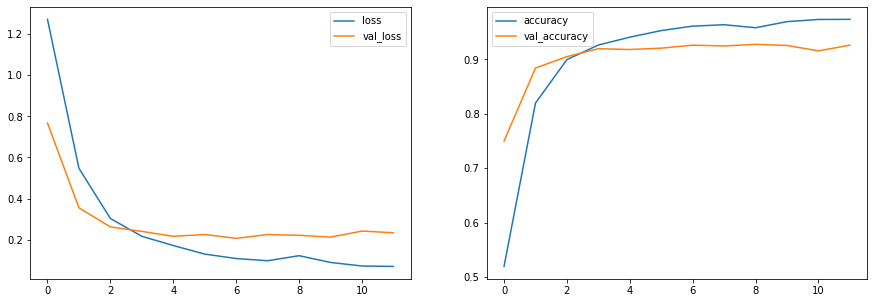

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["accuracy", "val_accuracy"]].plot(ax=axes[1])

In [32]:
y_pred = model.predict(X_test_pad)

63/63 [==============================] - 2s 12ms/step


In [33]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([3, 3, 3, 0, 3])

In [34]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
loss, accuracy

63/63 [==============================] - 1s 12ms/step - loss: 0.2015 - accuracy: 0.9210


(0.20148465037345886, 0.9210000038146973)